# FB Prophet - 2

In [1]:
import pandas as pd
import numpy as np
import holidays
from fbprophet import Prophet
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)


# Model 1

In [2]:
df = pd.read_csv('2018-2019_prophet.csv')

In [3]:
df= df.rename(columns={'Date': 'ds', 'Total': 'y'})

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

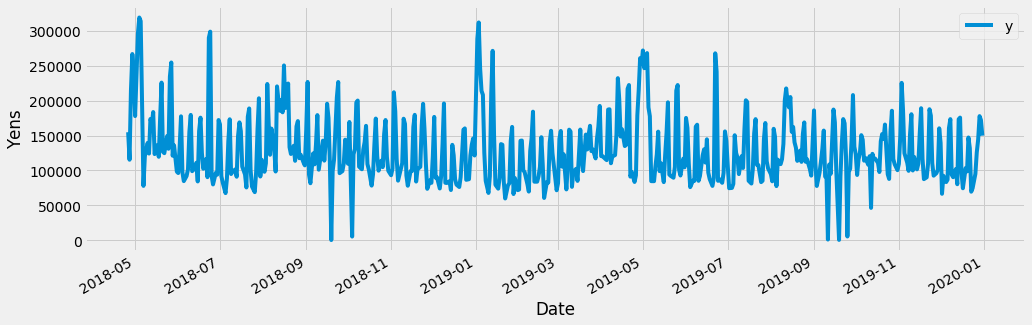

In [6]:
ax = df.set_index('ds').plot(figsize=(15, 5))
ax.set_ylabel('Yens')
ax.set_xlabel('Date')

plt.show()

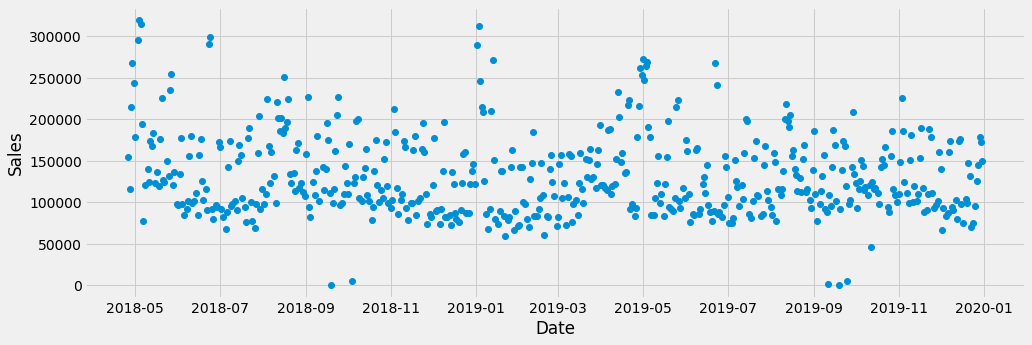

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df['ds'], df['y'], linestyle='None', marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

In [8]:
events = pd.DataFrame({
    'holiday': 'event',
    'ds': pd.to_datetime(['2018-04-28', '2018-04-29', '2018-04-30', 
                          '2018-05-03', '2018-05-04', '2018-05-05',
                          '2018-05-20', '2018-05-26', '2018-05-27',
                          '2018-06-23', '2018-06-24', '2018-07-29',
                          '2018-08-04', '2018-08-11', '2018-08-12', 
                          '2018-08-14', '2018-08-16', '2018-08-19',
                          '2018-09-02', '2018-09-23', '2018-09-24',
                          '2018-10-08', '2018-11-03', 
                          '2019-01-02', '2019-01-03', '2019-01-04',
                          '2019-01-05', '2019-01-06', '2019-01-12', 
                          '2019-01-13', '2019-04-13', '2019-04-14',
                          '2019-04-20', '2019-04-21', '2019-04-28',
                          '2019-04-29', '2019-04-30', '2019-05-01',
                          '2019-05-02', '2019-05-03', '2019-05-04', 
                          '2019-05-25', '2019-05-26', '2019-06-22',
                          '2019-06-23', '2019-07-14', '2019-08-11',
                          '2019-08-12', '2019-08-15', '2019-09-29', 
                          '2019-11-03',
                          '2020-01-02', '2020-01-03', '2020-01-04',
                          '2020-01-05', '2020-01-11', '2020-01-12',
                          '2020-01-13', '2020-02-02', '2020-02-14',
                          '2020-02-23']),
    'lower_window':0,
    'upper_window':1,
})
superholidays = pd.DataFrame({
    'holiday': 'superholiday',
    'ds': pd.to_datetime(['2018-04-29', '2018-05-03', '2018-05-04',
                          '2018-05-05', '2018-05-27', '2018-06-23', 
                          '2018-06-24', '2018-08-04',
                          '2019-01-02', '2019-01-03', '2019-01-13',
                          '2019-04-29', '2019-04-30', '2019-05-01',
                          '2019-05-03', '2019-05-04', '2019-06-22',
                          '2020-01-02', '2020-01-03', '2020-01-04',
                          '2020-01-11']),
    'lower_window':0,
    'upper_window':1,
})
holidays = pd.concat((events, superholidays))

In [9]:
# Hyperparameters
m = Prophet(holidays=holidays, 
            yearly_seasonality=True, 
            weekly_seasonality=True, 
            daily_seasonality=False, 
            interval_width=0.95, 
            seasonality_prior_scale=0.1)
m.add_country_holidays(country_name='JP')
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [10]:
#, yearly_seasonality=1, weekly_seasonality=True, daily_seasonality=False

In [11]:
future = m.make_future_dataframe(periods = 30)
future.tail()

ds
559 2020-01-26
560 2020-01-27
561 2020-01-28
562 2020-01-29
563 2020-01-30

In [12]:
m.train_holiday_names

0             event
1      superholiday
2                元日
3              成人の日
4            建国記念の日
5              春分の日
6              昭和の日
7             憲法記念日
8             みどりの日
9             こどもの日
10              海の日
11              山の日
12             敬老の日
13             秋分の日
14             体育の日
15             文化の日
16           勤労感謝の日
17            天皇誕生日
18             振替休日
19          天皇の即位の日
20    即位礼正殿の儀が行われる日
21            国民の休日
dtype: object

In [13]:
forecast = m.predict(future)

In [14]:
forecast[(forecast['event'] + forecast['superholiday']).abs()>0][
        ['ds','event','superholiday']][-10:]

ds         event  superholiday
484 2019-11-04   6641.951535      0.000000
535 2020-01-02  53507.793784  69141.138092
536 2020-01-03  60149.745319  88888.418187
537 2020-01-04  60149.745319  88888.418187
538 2020-01-05  60149.745319  19747.280096
539 2020-01-06   6641.951535      0.000000
544 2020-01-11  53507.793784  69141.138092
545 2020-01-12  60149.745319  19747.280096
546 2020-01-13  60149.745319      0.000000
547 2020-01-14   6641.951535      0.000000

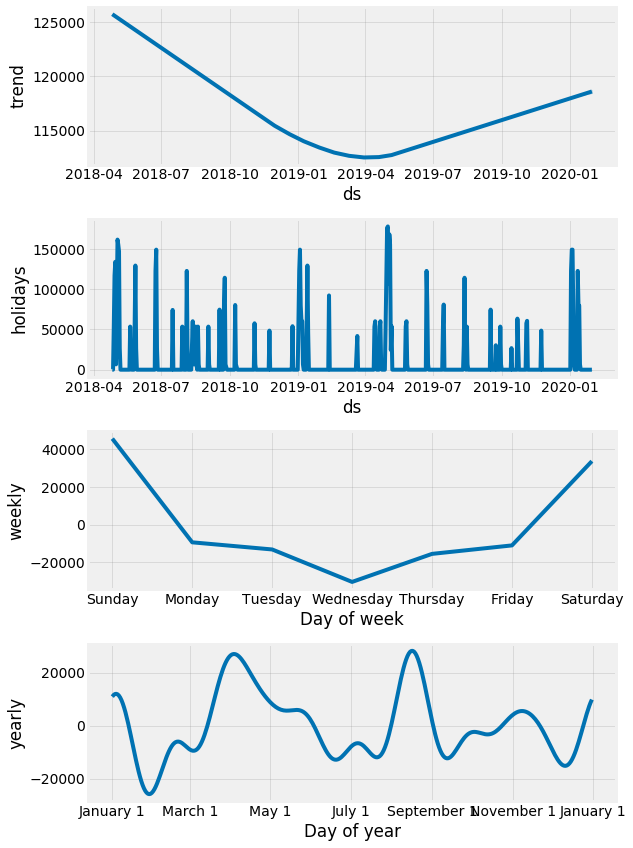

In [15]:
fig1 = m.plot_components(forecast)

In [16]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m,forecast)
py.iplot(fig)

### Metrics

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat    yhat_lower     yhat_upper
559 2020-01-26  140241.411678  98404.587778  180653.259422
560 2020-01-27   84452.330344  44016.544848  125658.913716
561 2020-01-28   80070.538272  39716.581543  126862.778720
562 2020-01-29   62551.376809  17775.297616  106314.574867
563 2020-01-30   77343.121175  36109.654294  119934.723260

In [18]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [19]:
metric_df.tail()

ds           yhat   y
559 2020-01-26  140241.411678 NaN
560 2020-01-27   84452.330344 NaN
561 2020-01-28   80070.538272 NaN
562 2020-01-29   62551.376809 NaN
563 2020-01-30   77343.121175 NaN

In [20]:
metric_df.dropna(inplace=True)

In [21]:
metric_df.tail()

ds           yhat         y
529 2019-12-27  110408.023836  125906.0
530 2019-12-28  156678.705307  144381.0
531 2019-12-29  170175.602873  177919.0
532 2019-12-30  116670.564537  172197.0
533 2019-12-31  114131.065450  149889.0

In [22]:
r2_score(metric_df.y, metric_df.yhat)

0.8149335230613556

In [23]:
mean_squared_error(metric_df.y, metric_df.yhat)**0.5

21406.433790952735

In [24]:
mean_absolute_error(metric_df.y, metric_df.yhat)

15383.164624598707

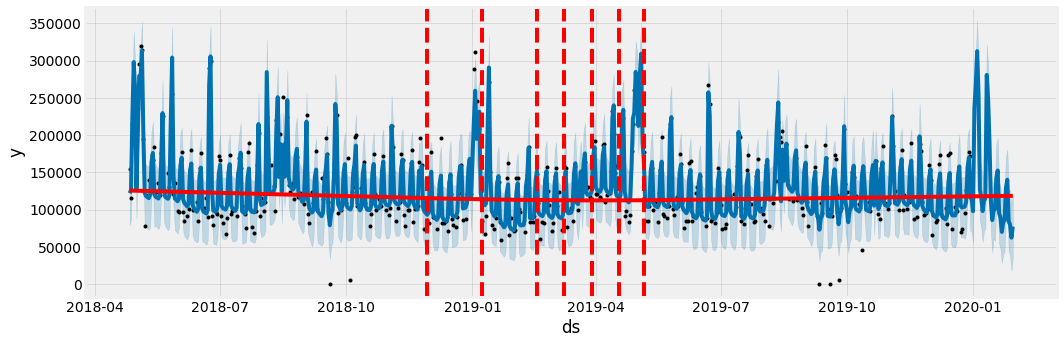

In [25]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast,figsize=(15, 5))
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Model 2

In [26]:
sales= pd.read_csv('2018-2020j_prophet.csv', index_col=[1], parse_dates=[0])

In [27]:
sales.drop(columns=['Unnamed: 0'], inplace=True)

In [28]:
sales.tail()

Total
Date              
2020-01-26  166096
2020-01-27   99064
2020-01-28   65286
2020-01-30   92291
2020-01-31  101845

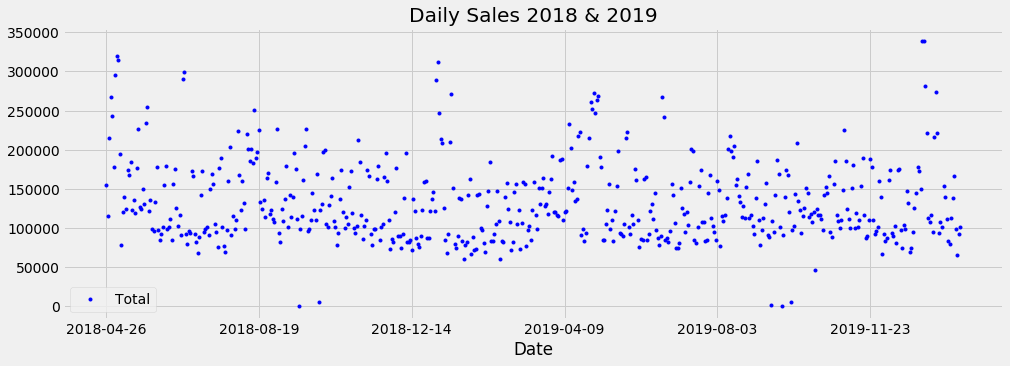

In [29]:
_=sales.plot(style='.', figsize=(15,5), color='b', title='Daily Sales 2018 & 2019')

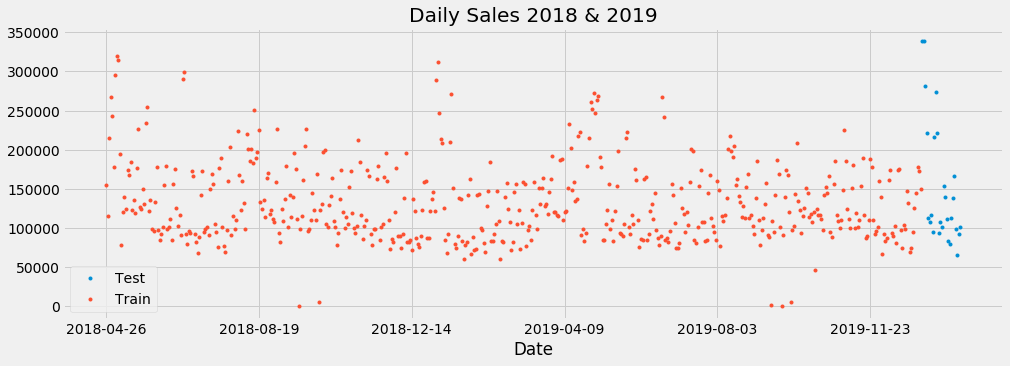

In [30]:
split_date = '2020-01-01'

train = sales.loc[sales.index <= split_date].copy()
test = sales.loc[sales.index > split_date].copy()

_=test.rename(columns={'Total': 'Test'})\
      .join(train.rename(columns={'Total': 'Train'}), how='outer')\
      .plot(figsize=(15,5), title='Daily Sales 2018 & 2019', style='.')

In [31]:
train=train.reset_index().rename(columns={'Date':'ds', 'Total':'y'})
test=test.reset_index().rename(columns={'Date':'ds', 'Total':'y'})
train.head()

ds       y
0  2018-04-26  154847
1  2018-04-27  115404
2  2018-04-28  214596
3  2018-04-29  266887
4  2018-04-30  243023

In [32]:
test.head()

ds       y
0  2020-01-02  338431
1  2020-01-03  338876
2  2020-01-04  280859
3  2020-01-05  221441
4  2020-01-06  112667

In [33]:
# Inital hyperparameters
modelo = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, 
            interval_width=0.95, seasonality_prior_scale=0.1)
modelo.add_country_holidays(country_name='JP')
modelo.fit(train)

In [34]:
pred=modelo.predict(test)

In [35]:
#f, ax=plt.subplots(1)
#f.set_figheight(5)
#f.set_figwidth(15)
#fig=modelo.plot(pred, ax=ax)

In [36]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(modelo,pred)
py.iplot(fig)

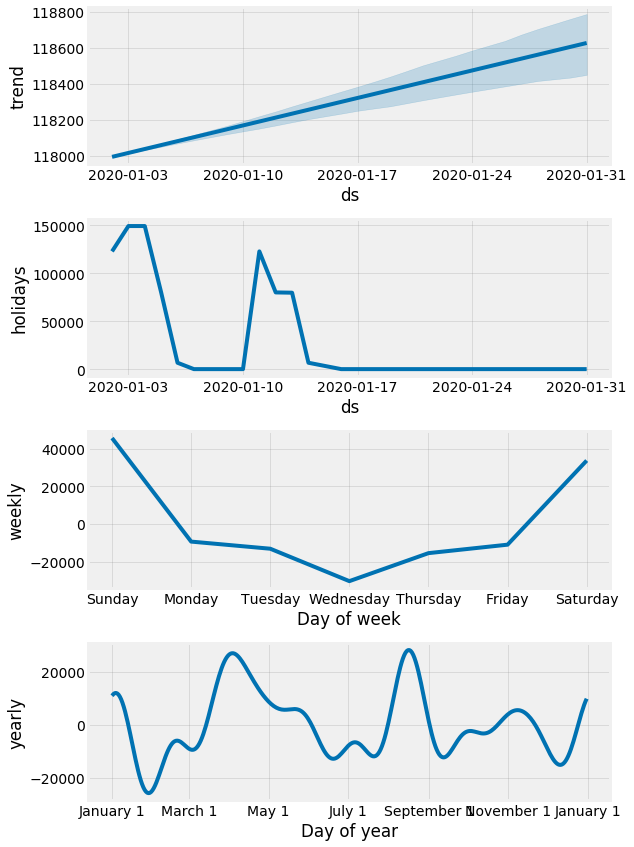

In [37]:
fig = modelo.plot_components(pred)

### Metrics

In [38]:
pred[['ds', 'yhat','yhat_lower','yhat_upper']].tail()

ds           yhat    yhat_lower     yhat_upper
21 2020-01-26  140241.411678  99709.452974  179312.382420
22 2020-01-27   84452.330344  43177.912568  126496.258311
23 2020-01-28   80070.538272  33500.882816  120996.088335
24 2020-01-30   77343.121175  36769.139454  122595.738389
25 2020-01-31   82036.017234  39737.509523  125086.878314

In [39]:
r2_score(test.y, pred.yhat)

0.8283021449778042

In [40]:
mean_squared_error(test.y, pred.yhat)**0.5

32598.57491833839

In [41]:
mean_absolute_error(test.y, pred.yhat)

23431.927772454863

In [42]:
def mape(y_true, y_pred):
    y_true, y_pred=np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [43]:
mape(test.y, pred.yhat)

14.055617122728167